In [29]:
import pandas as pd
df1 = pd.read_csv('List_of_Orders_55FFC79CF8.csv')
df1.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [30]:
df2 = pd.read_csv('Order_Details_19795F61CF.csv')
df2.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [31]:
df3 = pd.read_csv('Sales_target_DD2E9B96A0.csv')
df3.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


## EDA ON DF1

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [33]:
df1.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [37]:
df1.dropna(inplace = True)

In [38]:
df1.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [39]:
df1.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


## EDA on DF2

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [26]:
df2.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [41]:
df1.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


## EDA on DF3

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 996.0+ bytes


In [43]:
df3.isnull().sum()

Month of Order Date    0
Category               0
Target                 0
dtype: int64

In [44]:
df1.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


## Part 1: Sales and Profitability Analysis

In [45]:
merged_df = pd.merge(df1, df2, on='Order ID')

In [46]:
merged_df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [67]:
total_sales_by_category = merged_df.groupby('Category')['Amount'].sum().reset_index(name='Total Sales Amount')

In [68]:
total_sales_by_category

,Category,Total Sales Amount
0,Clothing,139054.0
1,Electronics,165267.0
2,Furniture,127181.0


In [72]:
average_profit_per_order = merged_df.groupby('Category')['Profit'].mean().reset_index(name='Average Profit per Order')

In [73]:
average_profit_per_order

,Category,Average Profit per Order
0,Clothing,11.762908
1,Electronics,34.071429
2,Furniture,9.456790


In [74]:
Sales_and_profitability = pd.merge(total_sales_by_category, average_profit_per_order, on='Category')

In [75]:
Sales_and_profitability

,Category,Total Sales Amount,Average Profit per Order
0,Clothing,139054.0,11.762908
1,Electronics,165267.0,34.071429
2,Furniture,127181.0,9.456790


In [77]:
Sales_and_profitability['Total Profit Margin (%)']= (Sales_and_profitability['Average Profit per Order']/Sales_and_profitability['Total Sales Amount'])*100

In [78]:
Sales_and_profitability

,Category,Total Sales Amount,Average Profit per Order,Total Profit Margin (%)
0,Clothing,139054.0,11.762908,0.008459
1,Electronics,165267.0,34.071429,0.020616
2,Furniture,127181.0,9.456790,0.007436


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

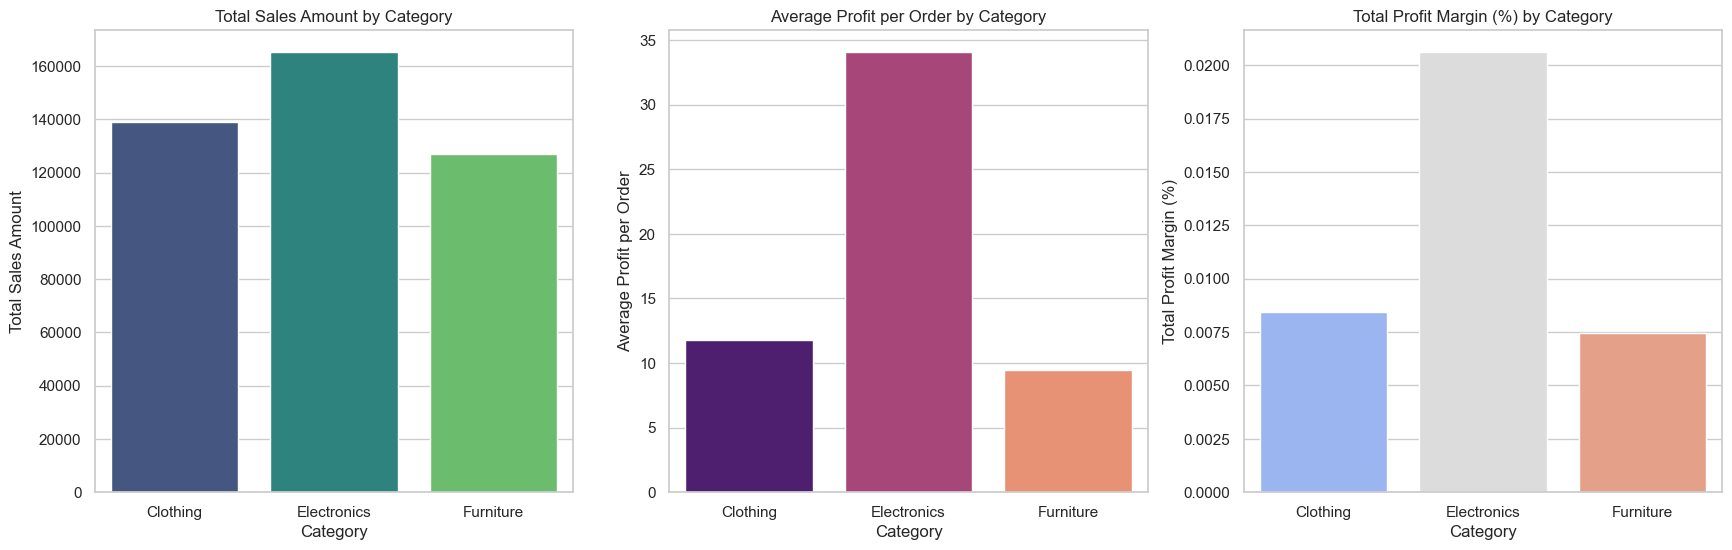

In [89]:
# Plot Total Sales Amount
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
sns.barplot(x='Category', y='Total Sales Amount', data=Sales_and_profitability, ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales Amount by Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Total Sales Amount')

# Plot Average Profit per Order
sns.barplot(x='Category', y='Average Profit per Order', data=Sales_and_profitability, ax=axes[1], palette='magma')
axes[1].set_title('Average Profit per Order by Category')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Average Profit per Order')

# Plot Total Profit Margin
sns.barplot(x='Category', y='Total Profit Margin (%)', data=Sales_and_profitability, ax=axes[2], palette='coolwarm')
axes[2].set_title('Total Profit Margin (%) by Category')
axes[2].set_xlabel('Category')
axes[2].set_ylabel('Total Profit Margin (%)')



plt.show()


## Part 2: Target Achievement Analysis


In [92]:
furniture_df = df3[df3['Category'] == 'Furniture'].copy()

In [93]:
furniture_df.loc[:, 'Percentage Change'] = furniture_df['Target'].pct_change() * 100

In [94]:
furniture_df

,Month of Order Date,Category,Target,Percentage Change
0,Apr-18,Furniture,10400.0,NaN
1,May-18,Furniture,10500.0,0.961538
2,Jun-18,Furniture,10600.0,0.952381
3,Jul-18,Furniture,10800.0,1.886792
4,Aug-18,Furniture,10900.0,0.925926
5,Sep-18,Furniture,11000.0,0.917431
6,Oct-18,Furniture,11100.0,0.909091
7,Nov-18,Furniture,11300.0,1.801802
8,Dec-18,Furniture,11400.0,0.884956
9,Jan-19,Furniture,11500.0,0.877193


C:\Users\Rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Rahul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


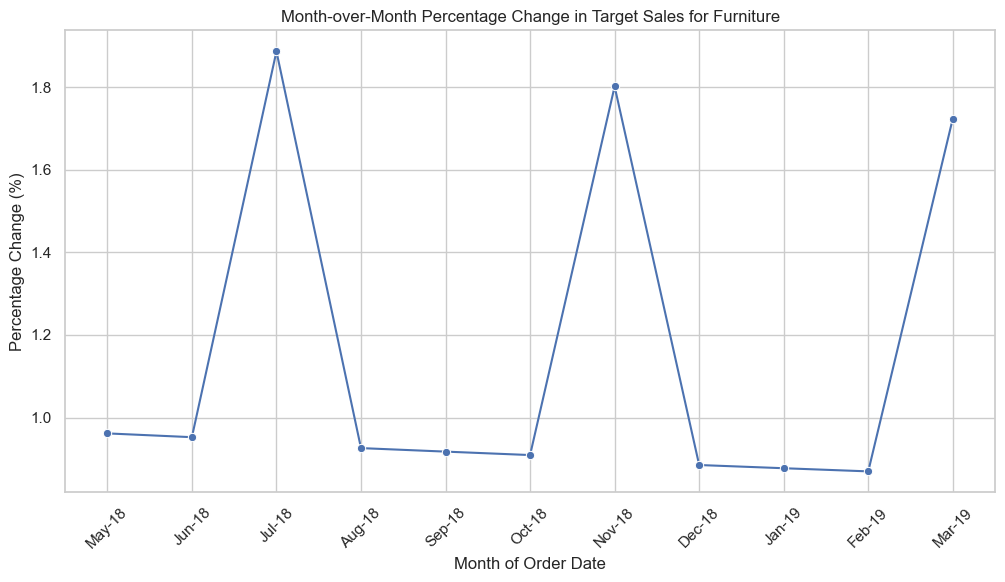

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=furniture_df, x='Month of Order Date', y='Percentage Change', marker='o')
plt.title('Month-over-Month Percentage Change in Target Sales for Furniture')
plt.xlabel('Month of Order Date')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.show()

## Part 3: Regional Performance Insights

In [104]:
order_counts = merged_df.groupby('State')['Order ID'].nunique().reset_index(name='Order Count')
order_counts_sorted = order_counts.sort_values(by='Order Count', ascending=False).reset_index(drop=True)

In [105]:
order_counts_sorted

,State,Order Count
0,Madhya Pradesh,101
1,Maharashtra,90
2,Rajasthan,32
3,Gujarat,27
4,Punjab,25
5,West Bengal,22
6,Delhi,22
7,Uttar Pradesh,22
8,Karnataka,21
9,Kerala,16


In [106]:
top_5_states = order_counts.sort_values(by='Order Count', ascending=False).head(5).reset_index()

In [107]:
top_5_states

,index,State,Order Count
0,10,Madhya Pradesh,101
1,11,Maharashtra,90
2,14,Rajasthan,32
3,4,Gujarat,27
4,13,Punjab,25


In [119]:
order_counts_city = merged_df.groupby('City')['Order ID'].nunique().reset_index(name='Order Count')
order_counts_city_sorted = order_counts_city.sort_values(by='Order Count', ascending=False).reset_index(drop=True)

In [120]:
order_counts_city_sorted

,City,Order Count
0,Indore,76
1,Mumbai,68
2,Chandigarh,30
3,Delhi,25
4,Pune,22
5,Bhopal,22
6,Kolkata,22
7,Bangalore,21
8,Jaipur,19
9,Ahmedabad,17


In [108]:
top_states_df = merged_df[merged_df['State'].isin(top_5_states['State'])]

In [109]:
# Calculate total sales and average profit for each of these states
state_sales_profit = top_states_df.groupby('State').agg(
    Total_Sales=('Amount', 'sum'),
    Average_Profit=('Profit', 'mean')
).reset_index()

In [110]:
state_sales_profit

,State,Total_Sales,Average_Profit
0,Gujarat,21058.0,5.344828
1,Madhya Pradesh,105140.0,16.326471
2,Maharashtra,95348.0,21.296552
3,Punjab,16786.0,-10.150000
4,Rajasthan,21149.0,16.986486


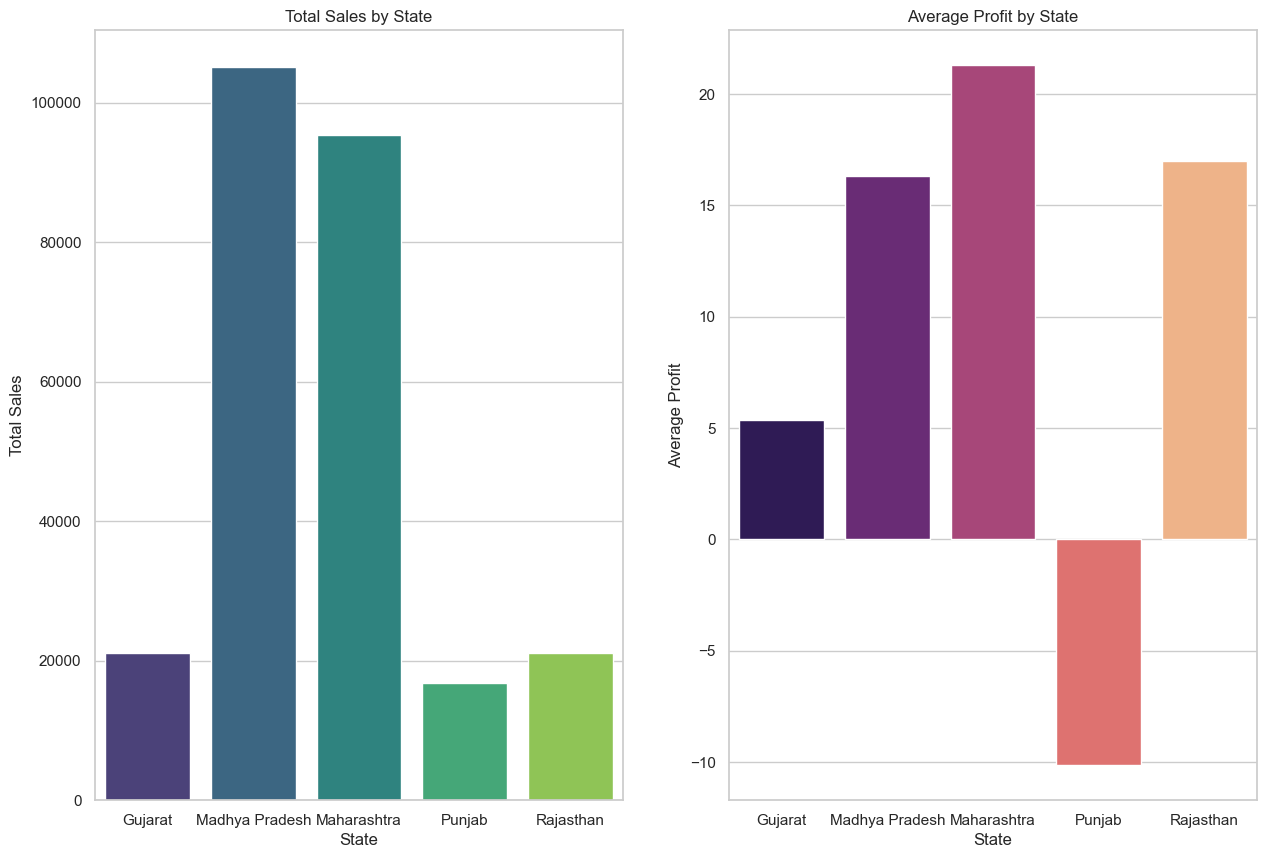

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot Total Sales
sns.barplot(x='State', y='Total_Sales', data=state_sales_profit, ax=axes[0], palette='viridis')
axes[0].set_title('Total Sales by State')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Total Sales')

# Plot Average Profit
sns.barplot(x='State', y='Average_Profit', data=state_sales_profit, ax=axes[1], palette='magma')
axes[1].set_title('Average Profit by State')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Average Profit')

plt.show()